In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [7]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [305]:
train_data=pd.read_csv("train.csv", encoding="latin1")
yTrain = train_data.pop("SalePrice") #La variable respuesta
xTrain = train_data.pop("LotArea") 

La separación entre train y test no es necesaria porque los datos ya fueron proporcionados de esa forma.

In [306]:
test_data=pd.read_csv("test.csv", encoding="latin1")
xTest = test_data.pop("LotArea") 

test_sample=pd.read_csv("sample_submission.csv", encoding="latin1")
yTest = test_sample.pop("SalePrice")

In [307]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
area = xTrain.values.reshape(-1,1)
area_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(area, price)
price_pred = lm.predict(area_t)

### Ecuación

In [308]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*area % + 0.4f '%(m,c)
print(label)

price_pred = 2.1000*area +158836.1519 


Text(0.5, 1.0, 'Test set lot area vs sale price')

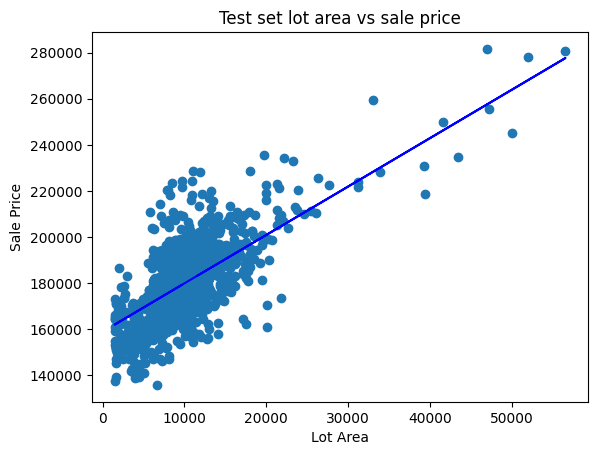

In [309]:
fig = plt.figure()
plt.scatter(area_t, price_t) # Valor teórico (test)
plt.plot(area_t, price_pred, color="blue") # valor predicho
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Test set lot area vs sale price")

In [310]:
print("R^2: %.2f"%r2_score(price_t,price_pred))
print("MSE: %.2f"%mean_squared_error(price_t,price_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(price_t, price_pred)))

R^2: 0.50
MSE: 135044064.74
RMSE: 11620.85


### Residuales

In [311]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[169277.0524984] [183242.02591962]  -->  		DIFF: [-13964.97342122]
[187758.39398877] [188796.45173189]  -->  		DIFF: [-1038.05774312]
[183583.68356955] [187878.76398899]  -->  		DIFF: [-4295.08041944]
[179317.47751083] [179789.67203102]  -->  		DIFF: [-472.19452019]
[150730.0799765] [169346.51151517]  -->  		DIFF: [-18616.43153867]
[177150.98924731] [179835.87141395]  -->  		DIFF: [-2684.88216665]
[172070.65922916] [175593.9280715]  -->  		DIFF: [-3523.26884234]
[175110.95651955] [176480.11623512]  -->  		DIFF: [-1369.15971558]
[162011.69883167] [180205.46647745]  -->  		DIFF: [-18193.76764579]
[160726.24783142] [176475.91629122]  -->  		DIFF: [-15749.6684598]
[157933.279456] [171137.78758998]  -->  		DIFF: [-13204.50813398]
[145291.24502039] [162364.10477575]  -->  		DIFF: [-17072.85975536]
[159672.01763182] [162364.10477575]  -->  		DIFF: [-2692.08714393]
[164167.51830188] [163624.08794677]  -->  		DIFF: [543.43035511]
[150891.63824405] [163624.08794677]  -->  		DIFF: [-12732.4497027

In [312]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 621
Valor real: [223581.75819089]
Valor predicho: [176713.21312176]
Diferencia máxima: [46868.54506912]


Text(0, 0.5, 'Residuales')

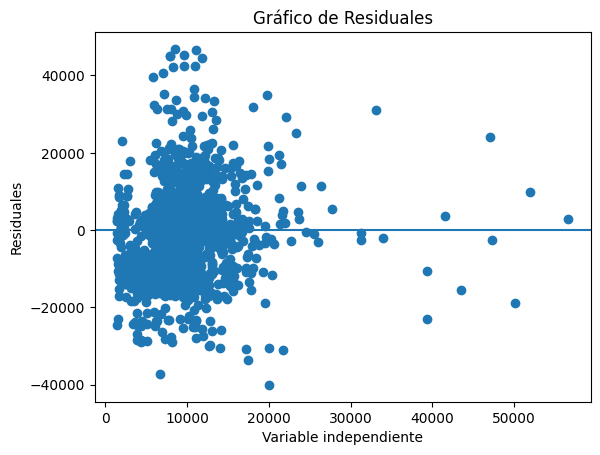

In [313]:
plt.plot(area_t,residuales, 'o')
plt.axhline(0)
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")


## Modelo multivariable

Separación de variables numéricas

In [351]:
train_data=pd.read_csv("train.csv", encoding="latin1")
test_data=pd.read_csv("test.csv", encoding="latin1")

columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Quitar columnas 'categoricas'
columnas_cuantitativas.remove("Id")
columnas_cuantitativas.remove("MSSubClass")
columnas_cuantitativas.remove("FullBath")
columnas_cuantitativas.remove("HalfBath")
columnas_cuantitativas.remove("BedroomAbvGr")
columnas_cuantitativas.remove("KitchenAbvGr")
columnas_cuantitativas.remove("TotRmsAbvGrd")
columnas_cuantitativas.remove("Fireplaces")
columnas_cuantitativas.remove("LotFrontage")
columnas_cuantitativas.remove("MasVnrArea")
columnas_cuantitativas.remove("GarageYrBlt")

_train = train_data[columnas_cuantitativas]

columnas_cuantitativas.remove("SalePrice") # no necesaria para test
_test = test_data[columnas_cuantitativas]

# Eliminar columnas que contienen NaN
_train = _train.dropna(axis=1)

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

y = _train.pop("SalePrice")
X = _train

Columnas usadas (27) :
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [352]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scaler = StandardScaler()  # Crear el escalador

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1021, 26)
(438, 26)
(1021,)
(438,)


In [353]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo1 = LinearRegression()
modelo1.fit(X_train, price)
y_pred_modelo1 = modelo1.predict(X_test)

### Ecuación

In [354]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 1379735.7055 + (0.3773 * LotArea) + (20271.4000 * OverallQual) + (4027.9983 * OverallCond) + (303.2788 * YearBuilt) + (206.1503 * YearRemodAdd) + (9.8270 * BsmtFinSF1) + (-1.0008 * BsmtFinSF2) + (1.1864 * BsmtUnfSF) + (10.0126 * TotalBsmtSF) + (18.8674 * 1stFlrSF) + (10.5365 * 2ndFlrSF) + (7.0488 * LowQualFinSF) + (36.4528 * GrLivArea) + (9108.2910 * BsmtFullBath) + (2216.9191 * BsmtHalfBath) + (13460.7339 * GarageCars) + (1.3792 * GarageArea) + (34.9725 * WoodDeckSF) + (-14.8185 * OpenPorchSF) + (11.1983 * EnclosedPorch) + (42.9295 * 3SsnPorch) + (65.9691 * ScreenPorch) + (-58.9326 * PoolArea) + (0.8178 * MiscVal) + (297.1081 * MoSold) + (-1238.6937 * YrSold)


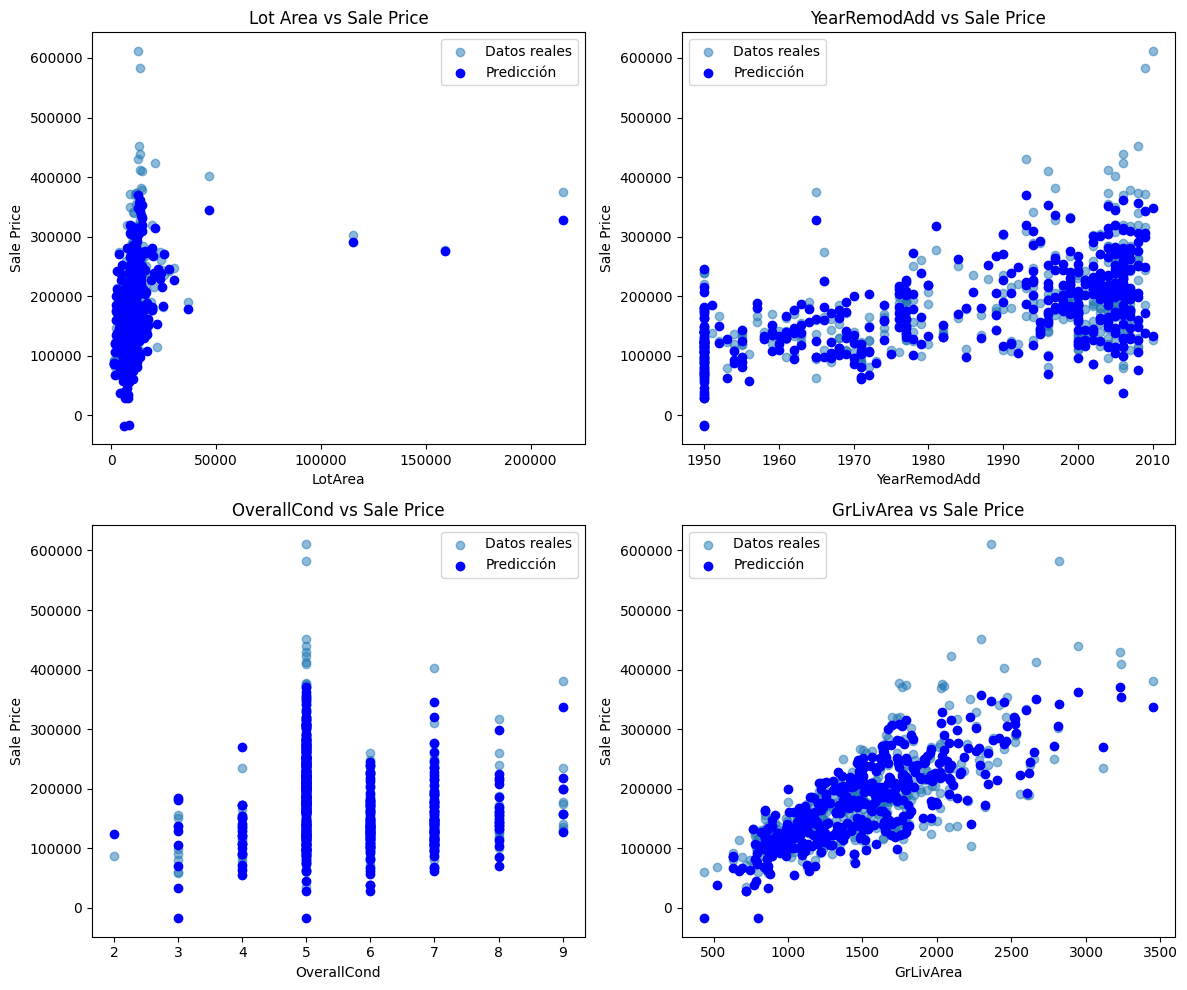

In [355]:
# Variables a graficar
variables = ["LotArea", "YearRemodAdd", "OverallCond", "GrLivArea"]
titles = ["Lot Area vs Sale Price", "YearRemodAdd vs Sale Price", 
          "OverallCond vs Sale Price", "GrLivArea vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo1, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [356]:
# Regression metrics
mse_modelo1=mean_squared_error(price_t, y_pred_modelo1) 
r2_modelo1=r2_score(y_test, y_pred_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))

R^2:  0.8328
MSE:  975647363.0131
RMSE:  31235.3544


### Análisis de residuos

In [357]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[370878] [305864.87028309]  -->  		DIFF: [65013.12971691]
[248000] [267753.9458901]  -->  		DIFF: [-19753.9458901]
[274970] [181455.90106584]  -->  		DIFF: [93514.09893416]
[145000] [174687.66777941]  -->  		DIFF: [-29687.66777941]
[180500] [156573.55703889]  -->  		DIFF: [23926.44296111]
[127000] [122335.47936899]  -->  		DIFF: [4664.52063101]
[176000] [177307.85074042]  -->  		DIFF: [-1307.85074042]
[157500] [139395.14819452]  -->  		DIFF: [18104.85180548]
[307000] [272675.26094243]  -->  		DIFF: [34324.73905757]
[125000] [135364.92615312]  -->  		DIFF: [-10364.92615312]
[115000] [114219.59644101]  -->  		DIFF: [780.40355899]
[144000] [122956.46040751]  -->  		DIFF: [21043.53959249]
[157000] [160955.77741577]  -->  		DIFF: [-3955.77741577]
[129500] [115833.65951222]  -->  		DIFF: [13666.34048778]
[187100] [202939.29780471]  -->  		DIFF: [-15839.29780471]
[204900] [222735.37467883]  -->  		DIFF: [-17835.37467883]
[318000] [281030.31286577]  -->  		DIFF: [36969.68713423]
[130000] [1133

In [358]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 412
Valor real: [611657]
Valor predicho: [347363.4662676]
Diferencia máxima: [264293.5337324]


Text(0, 0.5, 'Residuales')

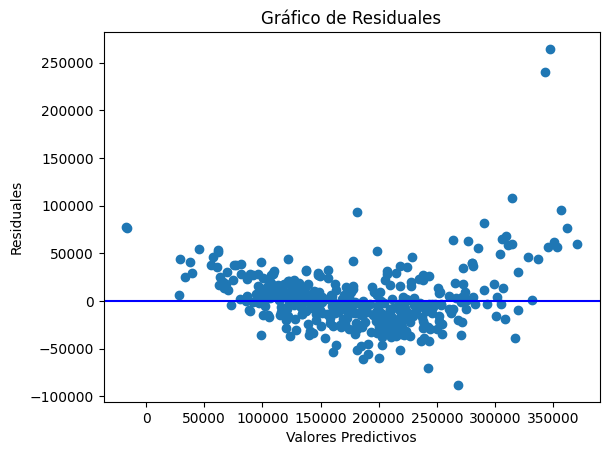

In [359]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')